In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

from tensorflow.keras.models import load_model
from data_utils import prepare_data, normalize_min_max_v2
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def f1_metric(val_1, val2):
    if val_1 + val2 == 0:
        return 0  # To avoid division by zero
    return 2 * (val_1 * val2) / (val_1 + val2)

PATH = 'results/cnn2d_models'

spectogram_map = {
    256: [8, 64, 128, 250],
    512: [0, 256, 511],
}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 20)        520       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2560)             

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 20)        520       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_13 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2560)             

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 20)        520       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_19 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2560)             

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


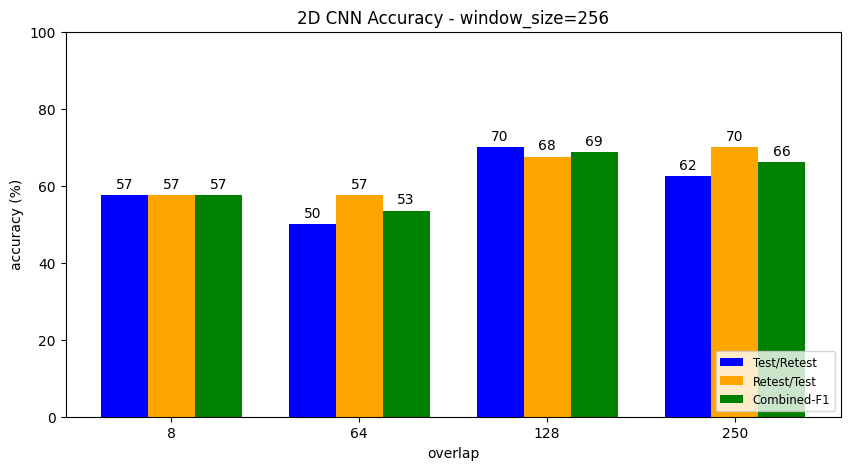

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 20)        520       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_25 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2560)             

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 20)        520       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_31 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2560)            

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 20)        520       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 20)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 20)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 40)        20040     
_________________________________________________________________
activation_37 (Activation)   (None, 16, 16, 40)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 40)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2560)            

/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/yahya/other/listener_cls_ffr/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


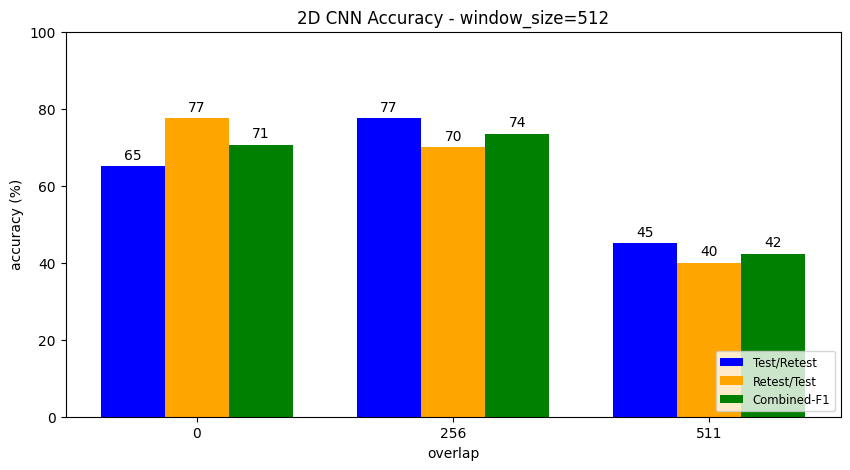

: 

In [3]:

for window_size, overlap_list in spectogram_map.items():
    tr_metrics = []
    rt_metrics = []
    tr_names = []
    for overlap in overlap_list:
        tr_exp = f'cnn2d_{window_size}_{overlap}_test_retest'
        rt_exp = f'cnn2d_{window_size}_{overlap}_retest_test'
        # Specify the path to the saved h5 model file
        test_retest_path = f'{PATH}/{tr_exp}.h5'
        retest_test_path = f'{PATH}/{rt_exp}.h5'

        # Load the model
        test_retest_model = load_model(test_retest_path)
        retest_test_model = load_model(retest_test_path)
        
        print(test_retest_model.summary())

        NPY_DATA_DIR = "npy_datasets"

        test_dataset = np.load(
            f"{NPY_DATA_DIR}/test_{window_size}_{overlap}_png.npy", allow_pickle=True
        )
        retest_dataset = np.load(
            f"{NPY_DATA_DIR}/retest_{window_size}_{overlap}_png.npy", allow_pickle=True
        )

        X_test, y_test = prepare_data(test_dataset)
        X_retest, y_retest = prepare_data(retest_dataset)

        X_test = normalize_min_max_v2(X_test, 0, 1)
        X_retest = normalize_min_max_v2(X_retest, 0, 1)

        # reshape only when grayscale
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
        X_retest = X_retest.reshape(X_retest.shape[0], X_retest.shape[1], X_retest.shape[2], 1)

        _, test_acc = test_retest_model.evaluate(X_retest, y_retest, verbose=0)
        _, retest_acc = retest_test_model.evaluate(X_test, y_test, verbose=0)
        
        test_acc = test_acc * 100
        retest_acc = retest_acc * 100

        tr_metrics.append(test_acc)
        rt_metrics.append(retest_acc)
        tr_names.append(f'{overlap}')

        print('test_acc', test_acc)
        print('retest_acc', retest_acc)

        test_pred = test_retest_model.predict(X_retest)
        test_pred_classes = np.argmax(test_pred, axis=1)
        y_test = np.argmax(y_test, axis=1)
        test_confusion_mtx = confusion_matrix(y_test, test_pred_classes)
        
        # Precision, recall, and F1 score for test_retest_model
        precision_test = precision_score(y_test, test_pred_classes, average='weighted')
        recall_test = recall_score(y_test, test_pred_classes, average='weighted')
        f1_score_test = f1_score(y_test, test_pred_classes, average='weighted')

        print(f"{window_size}_{overlap} Test-Retest Model Metrics:")
        print(f"Accuracy: {test_acc}")
        print(f"Precision: {precision_test}")
        print(f"Recall: {recall_test}")
        print(f"F1 Score: {f1_score_test}")

        retest_pred = retest_test_model.predict(X_test)
        retest_pred_classes = np.argmax(retest_pred, axis=1)
        y_retest = np.argmax(y_retest, axis=1)
        retest_confusion_mtx = confusion_matrix(y_retest, retest_pred_classes)
        
        # Precision, recall, and F1 score for retest_test_model
        precision_retest = precision_score(y_retest, retest_pred_classes, average='weighted')
        recall_retest = recall_score(y_retest, retest_pred_classes, average='weighted')
        f1_score_retest = f1_score(y_retest, retest_pred_classes, average='weighted')

        print(f"\n{window_size}_{overlap} Retest-Test Model Metrics:")
        print(f"Accuracy: {retest_acc}")
        print(f"Precision: {precision_retest}")
        print(f"Recall: {recall_retest}")
        print(f"F1 Score: {f1_score_retest}")

        # sns.heatmap(test_confusion_mtx, annot=True, fmt='d')
        # plt.title(f'{window_size}_{overlap} - Test/Retest - {test_acc:.3f}%')
        # plt.xlabel('Predicted')
        # plt.ylabel('True')
        # plt.savefig(f'{PATH}/plots/cnn2d_{window_size}_{overlap}_test_retest.png')
        # plt.show()

        # sns.heatmap(test_confusion_mtx, annot=True, fmt='d')
        # plt.title(f'{window_size}_{overlap} - Retest/Test - {retest_acc:.3f}%')
        # plt.xlabel('Predicted')
        # plt.ylabel('True')
        # plt.savefig(f'{PATH}/plots/cnn2d_{window_size}_{overlap}_retest_test.png')
        # plt.show()
        
    combined_f1 = []
    for i in range(len(tr_metrics)):
        combined_f1.append(f1_metric(tr_metrics[i], rt_metrics[i]))
    
    print(tr_metrics)
    print(rt_metrics)

    n = len(tr_metrics)  # Number of data pairs
    ind = np.arange(n)  # The x locations for the groups
    width = 0.25        # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 5))
    x_bars = ax.bar(ind - width, tr_metrics, width, label='Test/Retest', color='blue')
    y_bars = ax.bar(ind, rt_metrics, width, label='Retest/Test', color='orange')
    z_bars = ax.bar(ind + width, combined_f1, width, label='Combined-F1', color='green')
    
    for bar in x_bars + y_bars + z_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',  # Adjust format as needed
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords='offset points',
                    ha='center', va='bottom')

    ax.set_xlabel('overlap')
    ax.set_ylabel('accuracy (%)')
    ax.set_title(f'2D CNN Accuracy - window_size={window_size}')
    ax.set_xticks(ind)
    ax.set_xticklabels(tr_names)
    ax.set_ylim([0, 100])
    ax.legend(fontsize='small', loc='lower right')

    plt.savefig(f'{PATH}/plots/cnn2d_{window_size}_accuracy.png')
    plt.show()
